/home/edu/edu/repositorios/Estimating-Poverty-with-satellite-images/amb/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Grid coordinates saved to quito_grid_coordinates.csv


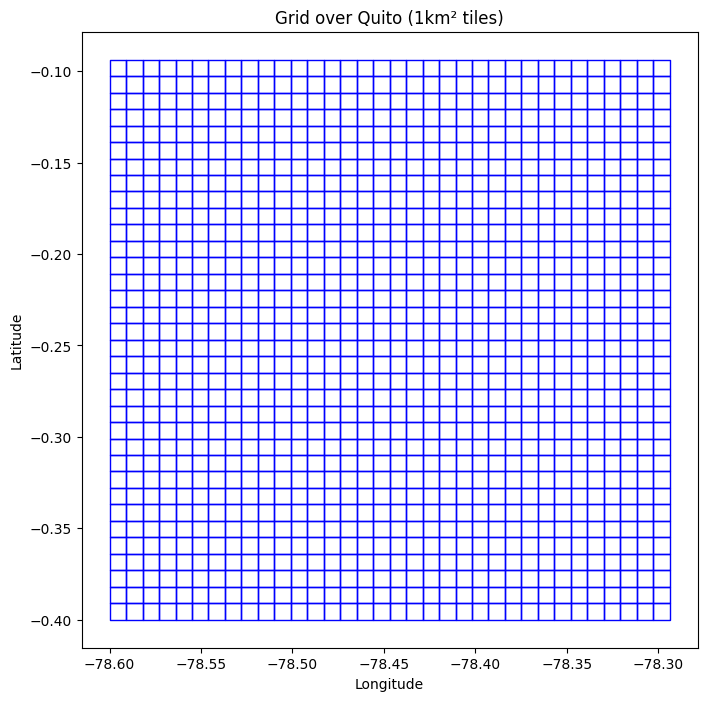

In [ ]:
import numpy as np
import pandas as pd
from sentinelhub import BBox, CRS
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

# Define Quito bounding box and resolution
quito_bbox_wgs84 = [-78.6, -0.4, -78.3, -0.1]  # [min_lon, min_lat, max_lon, max_lat]
tile_size_km = 1  # Tile size in kilometers
tile_size_deg = tile_size_km / 111  # Convert km to degrees (~111 km per degree)

# Generate the grid
minx, miny, maxx, maxy = quito_bbox_wgs84
grid_tiles = []
tile_coordinates = []

for lon in np.arange(minx, maxx, tile_size_deg):
    for lat in np.arange(miny, maxy, tile_size_deg):
        tile_bbox = BBox([lon, lat, lon + tile_size_deg, lat + tile_size_deg], crs=CRS.WGS84)
        grid_tiles.append(tile_bbox)
        tile_coordinates.append({
            "min_lon": lon,
            "min_lat": lat,
            "max_lon": lon + tile_size_deg,
            "max_lat": lat + tile_size_deg
        })

# Convert to DataFrame
df_tiles = pd.DataFrame(tile_coordinates)

# Save as CSV for reference
csv_path = "quito_grid_coordinates.csv"
df_tiles.to_csv(csv_path, index=False)
print(f"Grid coordinates saved to {csv_path}")

# Create a GeoDataFrame for visualization
gdf = gpd.GeoDataFrame(geometry=[box(t.min_lon, t.min_lat, t.max_lon, t.max_lat) for t in df_tiles.itertuples()])
gdf.crs = "EPSG:4326"

# Plot the grid
fig, ax = plt.subplots(figsize=(8, 8))
gdf.boundary.plot(ax=ax, color="blue", linewidth=1)
ax.set_title("Grid over Quito (1km² tiles)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()